# IS 6813 Swire Cola Capstone
Tommaso Pascucci

## Background

SCCU plans to optimize logistics by transitioning customers selling below a specific annual volume (to be determined by students, expressed in gallons or cases) to an Alternate Route to Market (ARTM) or white truck delivery. This is intended to reduce delivery costs and improve operational efficiency. However, this approach poses a risk: some customers on the ARTM list may have the potential to exceed this volume threshold (and become very high volume Customers) through the organic growth of their business, or with active support from SCCU. Moving these growth-ready, or high-growth-potential customers to ARTM prematurely could hinder SCCU revenue growth and long-term business opportunities, as we do not have the same level of contact with Customers using ARTM.

Sales data suggests certain customers currently selling below the threshold share characteristics with high-performing accounts, indicating untapped potential. For example, the business thinks that 400 gallons annually is the right threshold for customers who are local market partners and buy only fountain drinks but no CO2, cans, or bottles. However, is 400 gallons truly the optimal threshold? Could a better number be determined statistically to balance cost-efficiency with revenue growth opportunities? Are there other characteristics/Customer attributes that should be considered? Addressing these questions is critical to ensuring we have the most effective strategy.

Additionally, SCCU wants the analysis to be conducted for two distinct customer groups:
- Local Market Partners that buy fountain only: Customers who buy only fountain drinks and no CO2, no cans, and no bottles.
- All Customers: This group includes all customers, regardless of whether they are local market partners or not. It does not matter if they buy CO2, cans, bottles, or fountain drinks.
- 
The challenge lies in the absence of a systematic approach to identify these high-potential customers accurately. Without data-driven insights, there is a risk of misclassifying customers, leading to missed opportunities for revenue expansion and weakened customer relationships. Even among those customers already exceeding the threshold, we lack a systemic method for identifying high-growth potential customers.

To address this, SCCU must leverage historical sales data, customer profiles, and other customer interaction data to identify key growth indicators. By differentiating low-potential from high-potential accounts, the company can ensure that promising customers remain on direct delivery routes, and that we maximize our sales with them. This strategy will balance cost-efficiency with growth, safeguarding future revenue opportunities while maintaining a strong foundation for long-term business success. 

Specifically, the following Business Questions must be answered:
- What factors or characteristics distinguish customers with annual sales exceeding the determined volume threshold from those below this threshold?
- How can Swire Coca-Cola use historical sales data, or other Customer Characteristics to predict which ARTM customers have the potential to grow beyond the volume threshold annually?
- How can these insights be integrated into the routing strategy to support long-term growth while maintaining logistical efficiency?
- What levers can be employed to accelerate volume and share growth at growth-ready, high-potential customers?

**Key Definitions**

Alternate Route to Market (ARTM):

ARTM refers to a cost-effective logistics strategy where certain customers are served through alternative delivery methods, primarily using third-party trucks (white trucks) instead of direct delivery by Swire Coca-Cola's own fleet (red trucks). This approach is designed to optimize operational efficiency and reduce delivery costs while maintaining service quality for smaller-volume customers or those with less frequent orders.

Key Limitations of ARTM Deliveries:
1. Lack of control over truckload (requires a full load for delivery).
2. Reduced personal touch and relationship management with customers.

White Truck:

Deliveries made by third-party companies (e.g., Sysco Foods) on behalf of Swire Coca-Cola. White truck deliveries are part of the ARTM strategy and are used primarily for cost-efficiency.

Red Truck:

Deliveries made by Swire Coca-Cola's own fleet of trucks, ensuring direct customer contact and personalized service. Red trucks are typically used for larger-volume or high-touch customers.

Local Market Partners:

Local Market Partners are smaller, regionally focused customers who primarily serve their local communities. These customers typically are characterized by their reliance on local market dynamics and consistent purchasing patterns.



## Problem Statement

Analysis should include two groups:
- Local Market Partners: Customers who buy only fountain drinks and no CO2, no cans and no bottles.
- All Customers: Including those who may buy fountain drinks, CO2, cans, bottles, or any combination of these.

## Data

**Customer Profile**
| Column Name | Description |
|-------------|-------------|
| CUSTOMER_NUMBER | Unique identifier for each outlet/store |
| PRIMARY_GROUP_NUMBER | A unique identifier for each retailer. Multiple customer_numbers (outlets) belonging to the same primary_group (retailer) indicate they are part of a chain. |
| FREQUENT_ORDER_TYPE | Most common type of order placed by the customer (e.g., "MYCOKE LEGACY", "SALES REP"). |
| FIRST_DELIVERY_DATE | Date of the first delivery to the customer. |
| ON_BOARDING_DATE | Date the customer was onboarded. |
| COLD_DRINK_CHANNEL | General channel category for cold drink purchases (e.g., "DINING"). |
| TRADE_CHANNEL | Detailed channel classification (e.g., "OTHER DINING & BEVERAGE"). |
| SUB_TRADE_CHANNEL | Sub-classification within the trade channel (e.g., "OTHER DINING"). |
| LOCAL_MARKET_PARTNER | Boolean indicating if the customer is a local market partner (True/False). |
| CO2_CUSTOMER | Boolean indicating if the customer purchases CO2 products (True/False). |
| ZIP_CODE | ZIP code associated with the customer. |

Ordering Types
- MYCOKE LEGACY: Old digital ordering platform.
- EDI: Orders places via Electronic Data Interchange, bottler sales data is fed directly into retailer system which generates payments to bottlers.
- CALL CENTER: Customer places orders via call center.
- SALES REP: Sales representative enters customer orders.
- MYCOKE 360: New digital ordering platform launched in summer 2024.
- OTHER: Less common methods of ordering.

Number of Rows: 30,478

*MyCoke 360 replaced the legacy MyCoke platform to provide an improved, modernized digital ordering experience.

---
**Customer Address and ZIP Mapping**
| Column Name | Description |
|-------------|-------------|
| zip | ZIP code for the location. |
| full address | Full address information, including city, state, county, region, and latitude/longitude. |

Number of Rows: 1,801

Zip codes are blinded to protect data privacy and do not represent the actual store locations. While the zip codes are real, they do not correspond to the true delivery locations.

---
**Transactional Data**
| Column Name | Description |
|-------------|-------------|
| TRANSACTION_DATE | Date of the transaction (YYYY-MM-DD format). |
| WEEK | Week number of the year when the transaction occurred. |
| YEAR | Year of the transaction. |
| CUSTOMER_NUMBER | Unique identifier for the customer. |
| ORDER_TYPE | Type of order placed (e.g., "SALES REP", "MYCOKE LEGACY"). |
| ORDERED_CASES | Number of cases ordered by the customer. |
| LOADED_CASES | Number of cases loaded for delivery. |
| DELIVERED_CASES | Number of cases delivered to the customer. |
| ORDERED_GALLONS | Number of gallons ordered by the customer. |
| LOADED_GALLONS | Number of gallons loaded for delivery. |
| DELIVERED_GALLONS | Number of gallons delivered to the customer. |



Number of Rows: 1,045,540


Fountain drinks are measured in gallons (delivered as 'bag-in-box'), while bottles and cans are measured in cases. The total ordered, loaded, or delivered to a customer is the sum of gallons [fountain drinks] and cases [bottles and cans] . Cases are already converted to standard physical cases, with one standard physical case equating to one gallon, allowing for a direct summation of cases and gallons. 


Aggregation by Date, Not Order ID:
- The data is aggregated by transaction date, not by the individual order.
- Values for ORDERED_CASES, LOADED_CASES, and DELIVERED_CASES (and their gallon counterparts) in a single row do not necessarily belong to the same order.

Order Lifecycle:
- Orders may not be fully processed on the same day:
  - Ordered: Reflects orders created on the specific TRANSACTION_DATE.
  - Loaded: Represents the quantity loaded for delivery, which may belong to orders placed on previous days.
  - Delivered: Indicates the quantity delivered, which may correspond to orders created or loaded on earlier dates.


Example Scenario:
- An order placed on January 1st may appear under ORDERED_CASES for January 1st.
- The same order might be loaded for delivery on January 2nd and delivered on January 3rd.
- In this dataset, the rows are grouped by TRANSACTION_DATE, so all three events (ordered, loaded, delivered) appear in separate rows tied to their respective dates.

Relevance for Analysis:
- Students should consider the asynchronous nature of these fields when analyzing fulfillment rates, delivery efficiency, or customer behavior.
- To analyze at the order level, additional data (e.g., Order IDs or timestamps) would be required.


---
**Delivery Costs**
| Column Name | Description |
|-------------|-------------|
| Cold Drink Channel | Indicates Cold Drink Channel |
|Vol Range | Specifies the annual volume range (e.g., "0 - 149", "1350+"). |
| Applicable To | Defines the category of the product (e.g., "Fountain", "CO2", "Bottles and Cans"). |
| Median Delivery Cost | Represents the median cost of delivery for the respective category. |
| Cost Unit | Specifies the unit of cost measurement: - Fountain → Measured in gallons (Per Gallon)- Bottles and Cans → Measured in cases (Per Case). |

Number of Rows: 160

If a customer in the "AT WORK" channel purchases Fountain drinks and Bottles/Cans, the total delivery cost is calculated as follows:
1. Determine the volume range for each category (Fountain and Bottles/Cans).
2. Retrieve the median delivery cost per unit from the dataset.
3. Multiply the cost per unit by the quantity purchased for each category.
4. Sum the delivery costs to get the total.

A customer orders:
- Fountain: 600 gallons annually (Volume Range: 600 - 749) → Cost: $1.18 per gallon
- Bottles and Cans: 400 cases annually (Volume Range: 300 - 449) → Cost: $2.99 per case

The total delivery cost is calculated as follows:
- Fountain: 600×1.18=708.00
- Bottles and Cans: 400×2.99=1,196.00

Total Delivery Cost:
	$708.00 + $1,196.00 = $1,904.00

Thus, the total annual delivery cost for this customer in the "AT WORK" channel is $1,904.00.


# EDA

## Imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Numpy Version ', np.__version__)
print('Panda Version ', pd.__version__)

Numpy Version  1.26.4
Panda Version  2.2.2


## Loading in Raw Data

In [9]:
ca = pd.read_csv('customer_address_and_zip_mapping.csv')
cp = pd.read_csv('customer_profile.csv')
td = pd.read_csv('transactional_data.csv')
dc = pd.read_excel('delivery_cost_data.xlsx')

## Viewing Raw Data

### Customer Address and Zip Mapping

In [12]:
print('# of rows: ', ca.shape[0], '# of columns: ', ca.shape[1], '\n')
print(ca.columns, '\n')
print(ca.dtypes, '\n')
print(ca.count(), '\n')
print(ca.nunique(), '\n')
print('Total count of cell values', ca.size, '\n')
print('Both columns have no missing values', '\n', ca.isna().any(axis=0), '\n')
print(ca.describe())
display(ca)

# of rows:  1801 # of columns:  2 

Index(['zip', 'full address'], dtype='object') 

zip              int64
full address    object
dtype: object 

zip             1801
full address    1801
dtype: int64 

zip             1801
full address    1801
dtype: int64 

Total count of cell values 3602 

Both columns have no missing values 
 zip             False
full address    False
dtype: bool 

                zip
count   1801.000000
mean   28919.810105
std    25588.639728
min     1001.000000
25%     2153.000000
50%    21634.000000
75%    42440.000000
max    71483.000000


,zip,full address
0,71018,"71018,Cotton Valley,Louisiana,LA,Webster,119,3..."
1,71021,"71021,Cullen,Louisiana,LA,Webster,119,32.9721,..."
2,71023,"71023,Doyline,Louisiana,LA,Webster,119,32.49,-..."
3,71024,"71024,Dubberly,Louisiana,LA,Webster,119,32.519..."
4,71039,"71039,Heflin,Louisiana,LA,Webster,119,32.447,-..."
...,...,...
1796,40118,"40118,Fairdale,Kentucky,KY,Jefferson,111,38.10..."
1797,40201,"40201,Louisville,Kentucky,KY,Jefferson,111,38...."
1798,40202,"40202,Louisville,Kentucky,KY,Jefferson,111,38...."
1799,40203,"40203,Louisville,Kentucky,KY,Jefferson,111,38...."


### Customer Profile

In [14]:
print('# of rows: ', cp.shape[0], '# of columns: ', cp.shape[1], '\n')
print('columns', '\n', cp.columns, '\n')
print(cp.dtypes, '\n')
print(cp.count(), '\n')
print('unuque','\n',cp.nunique(), '\n')
print('Total count of cell values', cp.size, '\n')
print('PRIMARY_GROUP_NUMBER is the only column with missing numbers', '\n', cp.isna().any(axis=0), '\n')
print(cp.describe())
display(cp)

# of rows:  30478 # of columns:  11 

columns 
 Index(['CUSTOMER_NUMBER', 'PRIMARY_GROUP_NUMBER', 'FREQUENT_ORDER_TYPE',
       'FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE', 'COLD_DRINK_CHANNEL',
       'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER',
       'CO2_CUSTOMER', 'ZIP_CODE'],
      dtype='object') 

CUSTOMER_NUMBER           int64
PRIMARY_GROUP_NUMBER    float64
FREQUENT_ORDER_TYPE      object
FIRST_DELIVERY_DATE      object
ON_BOARDING_DATE         object
COLD_DRINK_CHANNEL       object
TRADE_CHANNEL            object
SUB_TRADE_CHANNEL        object
LOCAL_MARKET_PARTNER       bool
CO2_CUSTOMER               bool
ZIP_CODE                  int64
dtype: object 

CUSTOMER_NUMBER         30478
PRIMARY_GROUP_NUMBER    12282
FREQUENT_ORDER_TYPE     30478
FIRST_DELIVERY_DATE     30478
ON_BOARDING_DATE        30478
COLD_DRINK_CHANNEL      30478
TRADE_CHANNEL           30478
SUB_TRADE_CHANNEL       30478
LOCAL_MARKET_PARTNER    30478
CO2_CUSTOMER            30478
ZIP_CODE  

,CUSTOMER_NUMBER,PRIMARY_GROUP_NUMBER,FREQUENT_ORDER_TYPE,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE
0,501556470,376.0,MYCOKE LEGACY,1/2/2024,8/28/2023,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,False,21664
1,501363456,NaN,SALES REP,4/14/2022,3/22/2022,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,1885
2,600075150,2158.0,SALES REP,3/4/2016,3/22/2012,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,67073
3,500823056,2183.0,OTHER,2/6/2019,11/23/2018,DINING,FAST CASUAL DINING,ASIAN FAST FOOD,False,False,1885
4,600082383,1892.0,SALES REP,3/4/2016,8/31/2010,PUBLIC SECTOR,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,True,False,1203
...,...,...,...,...,...,...,...,...,...,...,...
30473,600565107,NaN,SALES REP,3/8/2017,9/20/2012,DINING,COMPREHENSIVE DINING,FSR - MISC,True,True,67651
30474,500954075,NaN,SALES REP,6/25/2019,6/11/2019,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,41129
30475,500799499,NaN,SALES REP,11/13/2018,10/11/2018,DINING,FAST CASUAL DINING,OTHER FAST FOOD,True,False,2350
30476,501484288,NaN,SALES REP,2/9/2023,1/31/2023,DINING,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21780


### Transactional Data

In [16]:
print('# of rows: ', td.shape[0], '# of columns: ', td.shape[1], '\n')
print(td.columns, '\n')
print(td.dtypes, '\n')
print(td.count(), '\n')
print(td.nunique(), '\n')
print('Total count of cell values', td.size, '\n')
print('ORDER_TYPE is the only column with missing numbers', '\n', td.isna().any(axis=0), '\n')
print(td.describe())
display(td)

# of rows:  1045540 # of columns:  11 

Index(['TRANSACTION_DATE', 'WEEK', 'YEAR', 'CUSTOMER_NUMBER', 'ORDER_TYPE',
       'ORDERED_CASES', 'LOADED_CASES', 'DELIVERED_CASES', 'ORDERED_GALLONS',
       'LOADED_GALLONS', 'DELIVERED_GALLONS'],
      dtype='object') 

TRANSACTION_DATE      object
WEEK                   int64
YEAR                   int64
CUSTOMER_NUMBER        int64
ORDER_TYPE            object
ORDERED_CASES        float64
LOADED_CASES         float64
DELIVERED_CASES      float64
ORDERED_GALLONS      float64
LOADED_GALLONS       float64
DELIVERED_GALLONS    float64
dtype: object 

TRANSACTION_DATE     1045540
WEEK                 1045540
YEAR                 1045540
CUSTOMER_NUMBER      1045540
ORDER_TYPE           1034409
ORDERED_CASES        1045540
LOADED_CASES         1045540
DELIVERED_CASES      1045540
ORDERED_GALLONS      1045540
LOADED_GALLONS       1045540
DELIVERED_GALLONS    1045540
dtype: int64 

TRANSACTION_DATE       723
WEEK                    52
YEAR        

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,DELIVERED_GALLONS
0,1/5/2023,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,90.0
1,1/6/2023,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,0.0
2,1/9/2023,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,0.0
3,1/11/2023,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,2.5
4,1/17/2023,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1045535,12/13/2024,50,2024,501075592,MYCOKE360,12.0,12.0,12.0,0.0,0.0,0.0
1045536,12/13/2024,50,2024,600249707,CALL CENTER,0.0,0.0,0.0,40.0,40.0,40.0
1045537,12/17/2024,51,2024,500463314,CALL CENTER,11.0,10.0,10.0,0.0,0.0,0.0
1045538,12/19/2024,51,2024,600079044,EDI,33.0,33.0,33.0,0.0,0.0,0.0


### Delivery Cost Data

In [18]:
print('# of rows: ', dc.shape[0], '# of columns: ', dc.shape[1], '\n')
print(dc.columns, '\n')
print(dc.dtypes, '\n')
print(dc.count(), '\n')
print(dc.nunique(), '\n')
print('Total count of cell values', dc.size, '\n')
print('Columns have no missing values', '\n', dc.isna().any(axis=0), '\n')
print(dc.describe())
display(dc)

# of rows:  160 # of columns:  5 

Index(['Cold Drink Channel', 'Vol Range', 'Applicable To',
       'Median Delivery Cost', 'Cost Type'],
      dtype='object') 

Cold Drink Channel       object
Vol Range                object
Applicable To            object
Median Delivery Cost    float64
Cost Type                object
dtype: object 

Cold Drink Channel      160
Vol Range               160
Applicable To           160
Median Delivery Cost    160
Cost Type               160
dtype: int64 

Cold Drink Channel        8
Vol Range                10
Applicable To             2
Median Delivery Cost    160
Cost Type                 2
dtype: int64 

Total count of cell values 800 

Columns have no missing values 
 Cold Drink Channel      False
Vol Range               False
Applicable To           False
Median Delivery Cost    False
Cost Type               False
dtype: bool 

       Median Delivery Cost
count            160.000000
mean               2.597196
std                1.714502
min      

,Cold Drink Channel,Vol Range,Applicable To,Median Delivery Cost,Cost Type
0,WORKPLACE,0 - 149,Bottles and Cans,8.064950,Per Case
1,WORKPLACE,150 - 299,Bottles and Cans,4.165646,Per Case
2,WORKPLACE,300 - 449,Bottles and Cans,2.991558,Per Case
3,WORKPLACE,450 - 599,Bottles and Cans,2.524222,Per Case
4,WORKPLACE,600 - 749,Bottles and Cans,2.056886,Per Case
...,...,...,...,...,...
155,BULK TRADE,750 - 899,Fountain,1.310382,Per Gallon
156,BULK TRADE,900 - 1049,Fountain,1.067788,Per Gallon
157,BULK TRADE,1050 - 1199,Fountain,0.825195,Per Gallon
158,BULK TRADE,1200 - 1349,Fountain,0.609853,Per Gallon


## Cleaning Raw Data

In [20]:
# Clean Customer Profile Data
cp["FIRST_DELIVERY_DATE"] = pd.to_datetime(cp["FIRST_DELIVERY_DATE"], errors='coerce')
cp["ON_BOARDING_DATE"] = pd.to_datetime(cp["ON_BOARDING_DATE"], errors='coerce')

# Fix: Use `.loc` to avoid SettingWithCopyWarning
cp.loc[:, "PRIMARY_GROUP_NUMBER"] = cp["PRIMARY_GROUP_NUMBER"].fillna(-1)

# Clean Transactional Data
td["TRANSACTION_DATE"] = pd.to_datetime(td["TRANSACTION_DATE"], errors='coerce')

# Fix: Use `.loc` for missing order type
td.loc[:, "ORDER_TYPE"] = td["ORDER_TYPE"].fillna("UNKNOWN")

# Create Total Ordered Volume
td["TOTAL_ORDERED_VOLUME"] = td["ORDERED_CASES"] + td["ORDERED_GALLONS"]



## Merging Tables

In [22]:
# Merge Customer Profile with Customer Address using ZIP_CODE
customer_data = cp.merge(ca, left_on="ZIP_CODE", right_on="zip", how="outer")

# Merge Transactional Data with Customer Data using CUSTOMER_NUMBER
full_data = td.merge(customer_data, on="CUSTOMER_NUMBER", how="outer")

display(full_data)

# Check summary statistics and missing values in the merged dataset

summary_stats = full_data.describe(include='all')  # Summary statistics for all columns
missing_values = full_data.isnull().sum()  # Count of missing values per column

print(summary_stats)
print(missing_values)
print(full_data.columns)
print(full_data[['YEAR','CUSTOMER_NUMBER','FIRST_DELIVERY_DATE']].describe())
print(full_data['CUSTOMER_NUMBER'].nunique())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,2024-08-26,35.0,2024.0,500245678,SALES REP,12.0,12.0,12.0,7.5,7.5,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
1,2024-10-28,44.0,2024.0,500245678,SALES REP,0.0,0.0,0.0,17.5,17.5,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
2,2023-05-02,18.0,2023.0,500245678,UNKNOWN,0.0,11.0,11.0,0.0,0.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
3,2023-09-11,37.0,2023.0,500245678,SALES REP,10.0,10.0,10.0,0.0,0.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
4,2024-10-14,42.0,2024.0,500245678,SALES REP,23.0,20.0,20.0,25.0,25.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045691,2024-05-30,22.0,2024.0,600975408,MYCOKE LEGACY,1.5,1.5,1.5,5.0,5.0,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045692,2024-09-05,36.0,2024.0,600975408,SALES REP,2.5,2.5,2.5,2.5,2.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045693,2024-07-11,28.0,2024.0,600975408,SALES REP,4.0,3.5,3.5,7.5,7.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045694,2023-09-21,38.0,2023.0,600975408,SALES REP,0.0,0.0,0.0,12.5,12.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."


                     TRANSACTION_DATE          WEEK          YEAR  \
count                         1045540  1.045540e+06  1.045540e+06   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2023-12-27 11:40:07.138894592  2.622860e+01  2.023497e+03   
min               2023-01-01 00:00:00  1.000000e+00  2.023000e+03   
25%               2023-06-30 00:00:00  1.400000e+01  2.023000e+03   
50%               2023-12-27 00:00:00  2.600000e+01  2.023000e+03   
75%               2024-06-25 00:00:00  3.800000e+01  2.024000e+03   
max               2024-12-31 00:00:00  5.200000e+01  2.024000e+03   
std                               NaN  1.451675e+01  4.999882e-01   

        CUSTOMER_NUMBER     ORDER_TYPE  ORDERED_CASES  LOADED_CASES  \
count      1.045696e+06        1045540   1.045540e+06  1.045540e+06   
unique              NaN      

now we are going to drop all the customer which had a first delivery data in 2024 as we wont be able to see a growth or decline as there is not enough data to base it on.

In [24]:
# Convert 'FIRST_DELIVERY_DATE' to datetime format if not already
full_data['FIRST_DELIVERY_DATE'] = pd.to_datetime(full_data['FIRST_DELIVERY_DATE'], errors='coerce')

# Filter out customers whose first delivery date is in 2024
filtered_data = full_data[full_data['FIRST_DELIVERY_DATE'].dt.year != 2024]

display(filtered_data)
print(filtered_data['FIRST_DELIVERY_DATE'].describe())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address
0,2024-08-26,35.0,2024.0,500245678,SALES REP,12.0,12.0,12.0,7.5,7.5,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
1,2024-10-28,44.0,2024.0,500245678,SALES REP,0.0,0.0,0.0,17.5,17.5,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
2,2023-05-02,18.0,2023.0,500245678,UNKNOWN,0.0,11.0,11.0,0.0,0.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
3,2023-09-11,37.0,2023.0,500245678,SALES REP,10.0,10.0,10.0,0.0,0.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
4,2024-10-14,42.0,2024.0,500245678,SALES REP,23.0,20.0,20.0,25.0,25.0,...,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045691,2024-05-30,22.0,2024.0,600975408,MYCOKE LEGACY,1.5,1.5,1.5,5.0,5.0,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045692,2024-09-05,36.0,2024.0,600975408,SALES REP,2.5,2.5,2.5,2.5,2.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045693,2024-07-11,28.0,2024.0,600975408,SALES REP,4.0,3.5,3.5,7.5,7.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."
1045694,2023-09-21,38.0,2023.0,600975408,SALES REP,0.0,0.0,0.0,12.5,12.5,...,2017-04-18,1999-06-09,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1..."


count                          1015421
mean     2019-02-04 09:06:13.546341888
min                2015-11-28 00:00:00
25%                2017-04-18 00:00:00
50%                2018-05-02 00:00:00
75%                2020-12-01 00:00:00
max                2023-12-29 00:00:00
Name: FIRST_DELIVERY_DATE, dtype: object


Now we will get the percentage change from 2023 total order quantity to 2024 total order quantity

In [26]:
# Ensure 'YEAR' is numeric
full_data['YEAR'] = pd.to_numeric(full_data['YEAR'], errors='coerce')

# Group by CUSTOMER_NUMBER and sum TOTAL_ORDERED_VOLUME for each year
order_summary = full_data.groupby(['CUSTOMER_NUMBER', 'YEAR'])['TOTAL_ORDERED_VOLUME'].sum().unstack()

# Calculate percent change from 2023 to 2024
order_summary['PERCENT_CHANGE'] = ((order_summary[2024] - order_summary[2023]) / order_summary[2023]) * 100

display(order_summary)
print(order_summary.describe())

YEAR,2023.0,2024.0,PERCENT_CHANGE
CUSTOMER_NUMBER,,,
500245678,370.00,383.5,3.648649
500245685,601.50,482.0,-19.866999
500245686,17.50,18.5,5.714286
500245687,125.00,147.5,18.000000
500245689,546.50,621.0,13.632205
...,...,...,...
600975319,91.25,105.0,15.068493
600975334,530.00,500.0,-5.660377
600975377,141.00,178.5,26.595745


YEAR          2023.0         2024.0  PERCENT_CHANGE
count   26052.000000   29601.000000    2.525900e+04
mean      718.022902     665.243551             inf
std      5013.988749    5194.927442             NaN
min         0.000000       0.000000   -1.000000e+02
25%        76.750000      60.000000   -2.377130e+01
50%       188.000000     156.000000   -4.031308e+00
75%       485.000000     430.000000    1.705253e+01
max    376588.000000  459175.740400             inf


Lets look at the rows that are causeing the inf and NaN 

In [28]:
# Identify rows causing `inf` (2023 orders = 0 but 2024 orders > 0)
inf_rows = order_summary[(order_summary[2023] == 0) & (order_summary[2024] > 0)]

# Identify rows causing `NaN` (both 2023 and 2024 orders = 0)
nan_rows = order_summary[(order_summary[2023] == 0) & (order_summary[2024] == 0)]

# Combine the two cases into a single dataset for review
problematic_rows = pd.concat([inf_rows, nan_rows])

display(problematic_rows)

YEAR,2023.0,2024.0,PERCENT_CHANGE
CUSTOMER_NUMBER,,,
500440142,0.0,1.0,inf
500510958,0.0,7.0,inf
500780491,0.0,22.0,inf
500956421,0.0,8.0,inf
500977835,0.0,30.0,inf
...,...,...,...
600251103,0.0,0.0,NaN
600251114,0.0,0.0,NaN
600252376,0.0,0.0,NaN


As only 111 rows out of 30322 have no 2023 order we will just drop them

In [30]:
# Drop rows causing `inf` or `NaN` in PERCENT_CHANGE
order_summary_cleaned = order_summary.drop(problematic_rows.index)

display(order_summary_cleaned)
print(order_summary_cleaned.describe())

YEAR,2023.0,2024.0,PERCENT_CHANGE
CUSTOMER_NUMBER,,,
500245678,370.00,383.5,3.648649
500245685,601.50,482.0,-19.866999
500245686,17.50,18.5,5.714286
500245687,125.00,147.5,18.000000
500245689,546.50,621.0,13.632205
...,...,...,...
600975319,91.25,105.0,15.068493
600975334,530.00,500.0,-5.660377
600975377,141.00,178.5,26.595745


YEAR          2023.0         2024.0  PERCENT_CHANGE
count   25941.000000   29490.000000    25220.000000
mean      721.095279     667.683922       28.910013
std      5024.484519    5204.541722      573.946309
min         0.000000       0.000000     -100.000000
25%        77.500000      60.500000      -23.811090
50%       190.000000     157.500000       -4.075165
75%       487.859384     431.437500       16.879007
max    376588.000000  459175.740400    80766.666667


now well add in percent change as a categorical veriable

In [32]:
# Ensure 'YEAR' is numeric
full_data['YEAR'] = pd.to_numeric(full_data['YEAR'], errors='coerce')

# Group by CUSTOMER_NUMBER and sum TOTAL_ORDERED_VOLUME for each year
order_summary = full_data.groupby(['CUSTOMER_NUMBER', 'YEAR'])['TOTAL_ORDERED_VOLUME'].sum().unstack()

# Calculate percent change from 2023 to 2024
order_summary['PERCENT_CHANGE'] = ((order_summary[2024] - order_summary[2023]) / order_summary[2023]) * 100

# Drop rows causing `inf` or `NaN` in PERCENT_CHANGE
order_summary_cleaned = order_summary.dropna().replace([float('inf'), -float('inf')], None).dropna()

# Create the first indicator column (growth vs decline)
order_summary_cleaned['GROWTH_DECLINE'] = order_summary_cleaned['PERCENT_CHANGE'].apply(lambda x: 'Growth' if x > 0 else 'Decline')

# Create the second indicator column (growth, same, decline)
order_summary_cleaned['GROWTH_SAME_DECLINE'] = order_summary_cleaned['PERCENT_CHANGE'].apply(lambda x: 'Growth' if x > 0 else ('Same' if x == 0 else 'Decline'))

display(order_summary_cleaned)

YEAR,2023.0,2024.0,PERCENT_CHANGE,GROWTH_DECLINE,GROWTH_SAME_DECLINE
CUSTOMER_NUMBER,,,,,
500245678,370.00,383.5,3.648649,Growth,Growth
500245685,601.50,482.0,-19.866999,Decline,Decline
500245686,17.50,18.5,5.714286,Growth,Growth
500245687,125.00,147.5,18.0,Growth,Growth
500245689,546.50,621.0,13.632205,Growth,Growth
...,...,...,...,...,...
600975319,91.25,105.0,15.068493,Growth,Growth
600975334,530.00,500.0,-5.660377,Decline,Decline
600975377,141.00,178.5,26.595745,Growth,Growth


merge in the other variables

In [52]:
# Aggregate all other variables by CUSTOMER_NUMBER
customer_features = full_data.groupby('CUSTOMER_NUMBER').agg({
    'ORDER_TYPE': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent order type
    'TOTAL_ORDERED_VOLUME': 'sum',  # Total volume ordered
    'FREQUENT_ORDER_TYPE': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent order type
    'FIRST_DELIVERY_DATE': 'min',  # Earliest recorded delivery
    'ON_BOARDING_DATE': 'min',  # Earliest onboarding date
    'COLD_DRINK_CHANNEL': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent cold drink channel
    'TRADE_CHANNEL': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent trade channel
    'SUB_TRADE_CHANNEL': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent sub trade channel
    'LOCAL_MARKET_PARTNER': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most common value
    'CO2_CUSTOMER': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most common value
    'ZIP_CODE': lambda x: x.mode()[0] if not x.mode().empty else None  # Most frequent ZIP code
}).reset_index()

# Merge with the order summary data
full_customer_data = order_summary_cleaned.merge(customer_features, on="CUSTOMER_NUMBER", how="left")


display(full_customer_data)

# Check for missing values in the merged dataset
print(full_customer_data.isnull().sum())

# Get general distribution statistics
print(full_customer_data.describe(include='all'))

,CUSTOMER_NUMBER,2023.0,2024.0,PERCENT_CHANGE,GROWTH_DECLINE,GROWTH_SAME_DECLINE,ORDER_TYPE,TOTAL_ORDERED_VOLUME,FREQUENT_ORDER_TYPE,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE
0,500245678,370.00,383.5,3.648649,Growth,Growth,SALES REP,753.50,SALES REP,2018-03-19,2015-03-11,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508
1,500245685,601.50,482.0,-19.866999,Decline,Decline,MYCOKE LEGACY,1083.50,OTHER,2018-03-02,2015-08-18,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,True,21913
2,500245686,17.50,18.5,5.714286,Growth,Growth,CALL CENTER,36.00,CALL CENTER,2023-03-07,2015-08-05,GOODS,SPECIALIZED GOODS,OTHER GOODS,True,False,1350
3,500245687,125.00,147.5,18.0,Growth,Growth,CALL CENTER,272.50,OTHER,2018-03-19,2015-08-06,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252
4,500245689,546.50,621.0,13.632205,Growth,Growth,MYCOKE LEGACY,1167.50,OTHER,2018-02-28,2015-08-25,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,42031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25215,600975319,91.25,105.0,15.068493,Growth,Growth,MYCOKE LEGACY,196.25,SALES REP,2017-03-22,1994-04-18,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,2332
25216,600975334,530.00,500.0,-5.660377,Decline,Decline,CALL CENTER,1030.00,SALES REP,2017-04-03,1994-07-18,ACCOMMODATION,ACCOMMODATION,OTHER ACCOMMODATION,True,False,2025
25217,600975377,141.00,178.5,26.595745,Growth,Growth,CALL CENTER,319.50,SALES REP,2017-03-23,2008-01-28,GOODS,VEHICLE CARE,OTHER VEHICLE CARE,True,False,2025
25218,600975383,54.00,61.0,12.962963,Growth,Growth,CALL CENTER,115.00,MYCOKE LEGACY,2017-05-18,2000-08-18,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,2025


CUSTOMER_NUMBER         0
2023.0                  0
2024.0                  0
PERCENT_CHANGE          0
GROWTH_DECLINE          0
GROWTH_SAME_DECLINE     0
ORDER_TYPE              0
TOTAL_ORDERED_VOLUME    0
FREQUENT_ORDER_TYPE     0
FIRST_DELIVERY_DATE     0
ON_BOARDING_DATE        0
COLD_DRINK_CHANNEL      0
TRADE_CHANNEL           0
SUB_TRADE_CHANNEL       0
LOCAL_MARKET_PARTNER    0
CO2_CUSTOMER            0
ZIP_CODE                0
dtype: int64
        CUSTOMER_NUMBER         2023.0         2024.0  PERCENT_CHANGE  \
count      2.522000e+04   25220.000000   25220.000000         25220.0   
unique              NaN            NaN            NaN         18575.0   
top                 NaN            NaN            NaN             0.0   
freq                NaN            NaN            NaN           309.0   
mean       5.440129e+08     736.698089     729.496792             NaN   
min        5.002457e+08       1.000000       0.000000             NaN   
25%        5.010996e+08      81.00

create second set of data for local market and no CO2 or Cases

In [36]:

# Aggregate the total ordered volume for different product categories
product_volume = full_data.groupby('CUSTOMER_NUMBER').agg({
    'ORDERED_GALLONS': 'sum',  # Fountain drinks (Gallons)
    'ORDERED_CASES': 'sum',  # Bottles and Cans
    'CO2_CUSTOMER': 'max'  # Boolean indicator (True if they buy CO2)
}).reset_index()

# Filter customers who meet the Local Market Partner criteria
local_market_partners = product_volume[
    (product_volume['ORDERED_GALLONS'] > 0) &  # They buy fountain drinks
    (product_volume['ORDERED_CASES'] == 0) &  # They do NOT buy bottles or cans
    (product_volume['CO2_CUSTOMER'] == False)  # They do NOT buy CO2
]

# Merge this subset with the full customer dataset
local_market_data = full_customer_data.merge(local_market_partners, on="CUSTOMER_NUMBER", how="inner")

# Ensure only rows where LOCAL_MARKET_PARTNER is True are kept
local_market_data = local_market_data[local_market_data['LOCAL_MARKET_PARTNER'] == True]

display(local_market_data)

,CUSTOMER_NUMBER,2023.0,2024.0,PERCENT_CHANGE,GROWTH_DECLINE,GROWTH_SAME_DECLINE,ORDER_TYPE,TOTAL_ORDERED_VOLUME,FREQUENT_ORDER_TYPE,FIRST_DELIVERY_DATE,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER_x,ZIP_CODE,ORDERED_GALLONS,ORDERED_CASES,CO2_CUSTOMER_y
0,500245726,60.0,30.0,-50.0,Decline,Decline,CALL CENTER,90.0,CALL CENTER,2018-03-22,2015-09-24,DINING,COMPREHENSIVE DINING,FSR - MISC,True,False,20751,90.0,0.0,False
1,500245826,180.0,160.0,-11.111111,Decline,Decline,CALL CENTER,340.0,OTHER,2018-03-26,2015-09-24,DINING,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21788,340.0,0.0,False
3,500246234,87.5,45.0,-48.571429,Decline,Decline,CALL CENTER,132.5,CALL CENTER,2016-04-27,2015-09-25,WORKPLACE,INDUSTRIAL,OTHER INDUSTRIAL,True,False,42033,132.5,0.0,False
4,500246267,370.0,277.5,-25.0,Decline,Decline,MYCOKE LEGACY,647.5,SALES REP,2015-12-10,2015-07-23,DINING,COMPREHENSIVE DINING,FSR - MISC,True,False,40371,647.5,0.0,False
5,500255458,262.5,295.0,12.380952,Growth,Growth,MYCOKE LEGACY,557.5,OTHER,2021-05-28,2015-04-20,PUBLIC SECTOR,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,True,False,2359,557.5,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,600584890,85.0,107.5,26.470588,Growth,Growth,MYCOKE LEGACY,192.5,OTHER,2017-06-19,1994-08-20,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,21078,192.5,0.0,False
1103,600585228,17.5,32.5,85.714286,Growth,Growth,CALL CENTER,50.0,SALES REP,2020-04-03,2000-04-06,DINING,MOBILE RETAIL,MOBILE RETAIL,True,False,2364,50.0,0.0,False
1104,600586246,505.0,462.5,-8.415842,Decline,Decline,MYCOKE LEGACY,967.5,SALES REP,2017-03-17,1996-05-20,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,1864,967.5,0.0,False
1108,600975141,105.0,52.5,-50.0,Decline,Decline,SALES REP,157.5,SALES REP,2017-03-24,2014-12-24,DINING,FAST CASUAL DINING,SANDWICH FAST FOOD,True,False,42064,157.5,0.0,False


# Modeling

## Unsupervised

### Kmeans model


C:\Users\pascu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pascu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pascu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pascu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pascu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

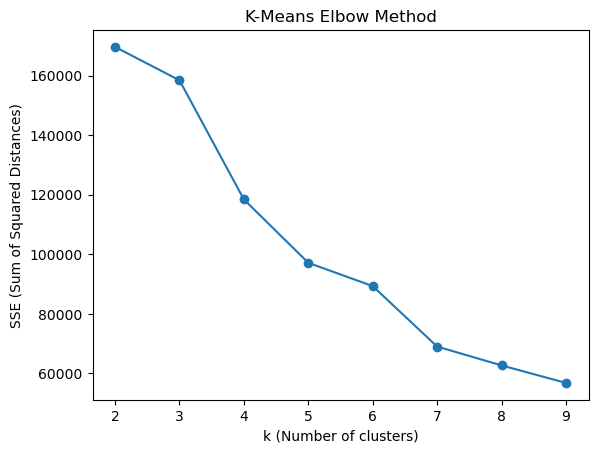

k=2, silhouette=0.2307
k=3, silhouette=0.1936
k=4, silhouette=0.1977
k=5, silhouette=0.2483
k=6, silhouette=0.2693
k=7, silhouette=0.2786
k=8, silhouette=0.2927
k=9, silhouette=0.3131
   2023.0  2024.0 PERCENT_CHANGE  TOTAL_ORDERED_VOLUME  LOCAL_MARKET_PARTNER  \
0   370.0   383.5       3.648649                 753.5                     1   
1   601.5   482.0     -19.866999                1083.5                     1   
2    17.5    18.5       5.714286                  36.0                     1   
3   125.0   147.5           18.0                 272.5                     1   
4   546.5   621.0      13.632205                1167.5                     1   

   CO2_CUSTOMER  ZIP_CODE  FIRST_DELIVERY_DATE_num  ON_BOARDING_DATE_num  \
0             1     66508                      842                 12275   
1             1     21913                      825                 12435   
2             0      1350                     2656                 12422   
3             1     42252      

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1) Assume you have your full_customer_data loaded as a DataFrame
#    e.g., full_customer_data = pd.read_csv('your_data.csv')
# -------------------------------------------------------

# a) Convert date columns to datetime, then to numeric
date_cols = ['FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE']  # Adjust as needed
for col in date_cols:
    if col in full_customer_data.columns:
        # Convert to datetime
        full_customer_data[col] = pd.to_datetime(full_customer_data[col], errors='coerce')
        
        # Calculate "days since earliest date"
        min_date = full_customer_data[col].min()
        numeric_col = col + "_num"
        full_customer_data[numeric_col] = (full_customer_data[col] - min_date).dt.days
        
        # Drop the original date column
        full_customer_data.drop(columns=[col], inplace=True, errors='ignore')

# b) Convert booleans to int if needed (makes them 0/1)
bool_cols = ['LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER']  # Adjust as needed
for col in bool_cols:
    if col in full_customer_data.columns and full_customer_data[col].dtype == 'bool':
        full_customer_data[col] = full_customer_data[col].astype(int)

# c) One-hot encode categorical/object columns
#    Decide which columns you want to encode vs. drop
cat_cols = [
    'ORDER_TYPE', 
    'FREQUENT_ORDER_TYPE', 
    'COLD_DRINK_CHANNEL', 
    'TRADE_CHANNEL', 
    'SUB_TRADE_CHANNEL'
]
# Filter cat_cols to only those that exist in the DataFrame
cat_cols = [col for col in cat_cols if col in full_customer_data.columns]

full_customer_data = pd.get_dummies(
    full_customer_data, 
    columns=cat_cols, 
    drop_first=True
)

# d) Convert all column names to string (good practice for sklearn)
full_customer_data.columns = full_customer_data.columns.astype(str)

# e) Drop columns you don't want in the clustering feature set
#    e.g., drop ID columns, label columns if any
drop_cols = [
    'CUSTOMER_NUMBER', 
    'GROWTH_DECLINE', 
    'GROWTH_SAME_DECLINE',
    # add others you don't want in the final clustering
]
full_customer_data.drop(columns=drop_cols, inplace=True, errors='ignore')

# -------------------------------------------------------
# 2) Select only numeric columns for clustering
# -------------------------------------------------------
X = full_customer_data.select_dtypes(include=[np.number]).copy()

# -------------------------------------------------------
# 3) Scale the numeric features
# -------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------------
# 4) K-means clustering: elbow method + silhouette scores
# -------------------------------------------------------
K_range = range(2, 10)
sse = []
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    sse.append(kmeans_temp.inertia_)

# Plot elbow
plt.plot(K_range, sse, marker='o')
plt.xlabel('k (Number of clusters)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('K-Means Elbow Method')
plt.show()

# Print silhouette scores
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels_temp)
    print(f'k={k}, silhouette={sil_score:.4f}')

# -------------------------------------------------------
# 5) Final K-means with chosen k
# -------------------------------------------------------
final_k = 4  # example choice
kmeans = KMeans(n_clusters=final_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to your DataFrame
full_customer_data['Cluster'] = cluster_labels

# Done! Now you can inspect your new 'Cluster' column.
print(full_customer_data.head())

### Hierarchical clustering

k=2, silhouette=0.9469
k=3, silhouette=0.2629
k=4, silhouette=0.3104
k=5, silhouette=0.3494
k=6, silhouette=0.3495
k=7, silhouette=0.3606
k=8, silhouette=0.3565
k=9, silhouette=0.3717


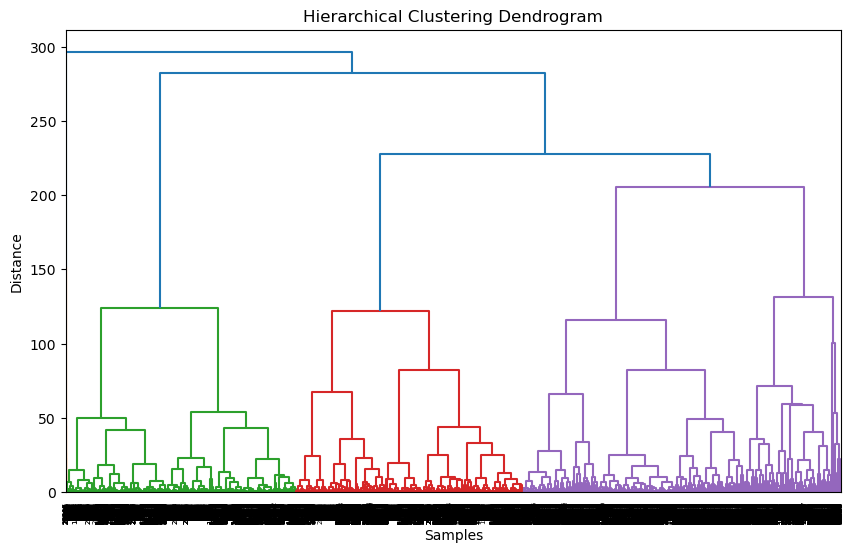

           TOTAL_ORDERED_VOLUME           PERCENT_CHANGE           
                           mean    median           mean     median
HC_Cluster                                                         
0                   2112.962711     524.0       6.739442  -5.102041
1                 387702.479127  275412.0       6.357906  10.729387
2                    730.446739     310.0       63.66356  -1.704545
3                    733.366613     334.5      24.792091  -4.262295


In [67]:
import pandas as pd
import numpy as np

# For clustering, scaling, and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# For dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# ------------------------------
# 1) Load / Prepare Your Data
# ------------------------------

# Suppose you already have your DataFrame:
# full_customer_data = pd.read_csv("your_data.csv")

# Example steps:
# a) Convert date columns (if any) to numeric
date_cols = ['FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE']  # Adjust to your actual date columns
for col in date_cols:
    if col in full_customer_data.columns:
        full_customer_data[col] = pd.to_datetime(full_customer_data[col], errors='coerce')
        min_date = full_customer_data[col].min()
        # Create numeric column = days since earliest date
        numeric_col = col + "_num"
        full_customer_data[numeric_col] = (full_customer_data[col] - min_date).dt.days
        full_customer_data.drop(columns=[col], inplace=True, errors='ignore')

# b) Convert booleans to numeric (0/1) if needed
bool_cols = ['LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER']  # Adjust as needed
for col in bool_cols:
    if col in full_customer_data.columns and full_customer_data[col].dtype == 'bool':
        full_customer_data[col] = full_customer_data[col].astype(int)

# c) One-hot encode categorical (object) columns if you want them in the model
cat_cols = ['ORDER_TYPE', 'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']
cat_cols = [c for c in cat_cols if c in full_customer_data.columns]
full_customer_data = pd.get_dummies(full_customer_data, columns=cat_cols, drop_first=True)

# d) Drop columns you do NOT want for clustering (ID columns, labels, etc.)
cols_to_drop = [
    'CUSTOMER_NUMBER',        # Example ID column
    'GROWTH_DECLINE',         # Example label
    'GROWTH_SAME_DECLINE'     # Example label
]
full_customer_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# e) Ensure all remaining columns are numeric
#    Then select them for clustering
X = full_customer_data.select_dtypes(include=[np.number]).copy()

# f) Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 2) Hierarchical Clustering
# ------------------------------

K_range = range(2, 10)
for k in K_range:
    # For ward linkage, scikit-learn automatically uses Euclidean distance
    hc_temp = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    labels_temp = hc_temp.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels_temp)
    print(f'k={k}, silhouette={sil:.4f}')

# Pick final k (for example, 4)
k_final = 4
hc_final = AgglomerativeClustering(n_clusters=k_final, linkage='ward')
hc_labels = hc_final.fit_predict(X_scaled)

# Attach the cluster labels to your DataFrame
full_customer_data['HC_Cluster'] = hc_labels

# ------------------------------
# 3) (Optional) Dendrogram
# ------------------------------
# If the dataset is large, consider sampling first, e.g.:
# X_sample = X_scaled[np.random.choice(X_scaled.shape[0], 500, replace=False)]

# For demonstration, let's do a dendrogram on X_scaled (could be large).
Z = linkage(X_scaled, method='ward')  # 'average', 'complete', 'single' also possible

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode=None, p=30)  # p=30 => show last 30 merges if you want
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# ------------------------------
# 4) Inspect / Analyze Clusters
# ------------------------------
summary = full_customer_data.groupby('HC_Cluster').agg({
    'TOTAL_ORDERED_VOLUME': ['mean','median'],
    'PERCENT_CHANGE': ['mean','median']
    # Add more numeric columns as needed
})
print(summary)

## Supervised

### XGBoost Model Local martket data set

Accuracy: 0.5938
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       119
           1       0.46      0.36      0.40        73

    accuracy                           0.59       192
   macro avg       0.55      0.55      0.55       192
weighted avg       0.58      0.59      0.58       192



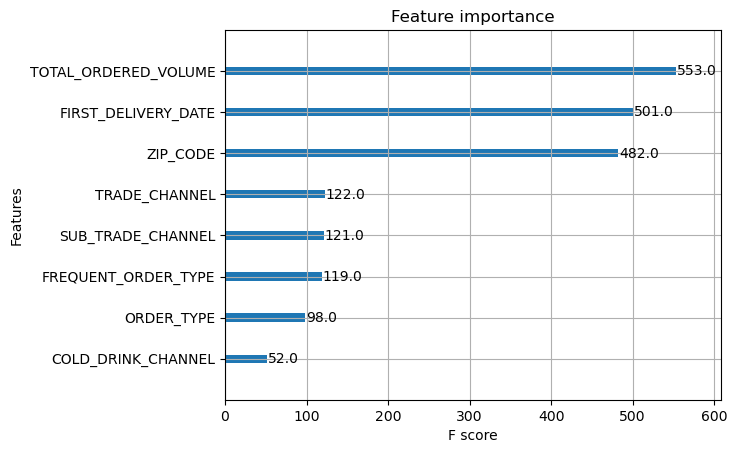

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Copying dataset
df = local_market_data.copy()

# Drop unwanted columns (dates and unnecessary features)
df = df.drop(columns=[ "ON_BOARDING_DATE", "PERCENT_CHANGE", "GROWTH_SAME_DECLINE", 2023.0, 2024.0, "CUSTOMER_NUMBER"])

# Convert datetime columns to the number of days since a reference date
reference_date = pd.to_datetime("2022-01-01")  # You can change this reference

df["FIRST_DELIVERY_DATE"] = (pd.to_datetime(df["FIRST_DELIVERY_DATE"]) - reference_date).dt.days

# Convert categorical columns to numeric
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Define features and target variable
X = df.drop(columns=['GROWTH_DECLINE'])  
y = df['GROWTH_DECLINE']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model (correct approach)
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100  # Now correctly used
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Feature importance plot
xgb.plot_importance(model)
plt.show()


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Optimized Accuracy: 0.6562
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       119
           1       0.68      0.18      0.28        73

    accuracy                           0.66       192
   macro avg       0.67      0.56      0.53       192
weighted avg       0.66      0.66      0.59       192



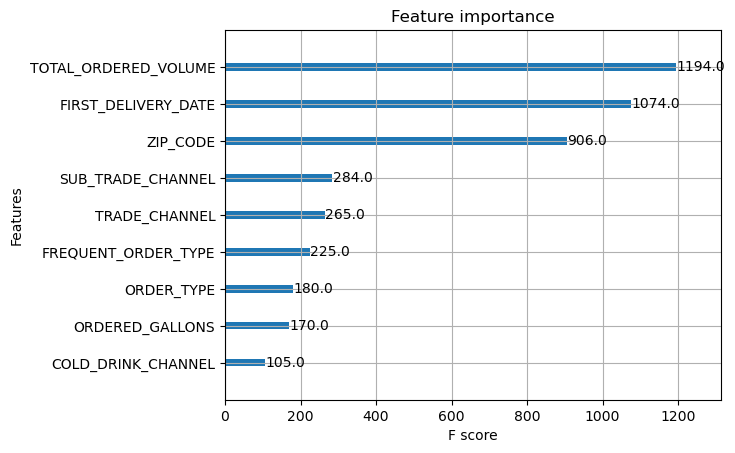

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#  define hyperparamater grid
param_grid = {
    'max_depth': [3, 6, 9],              # Controls tree complexity
    'learning_rate': [0.01, 0.1, 0.2],   # How much each tree contributes
    'n_estimators': [50, 100, 200],      # Number of boosting rounds
    'subsample': [0.8, 1.0],             # Fraction of data per boosting round
    'colsample_bytree': [0.8, 1.0],      # Fraction of features per tree
    'reg_lambda': [0, 1, 10],            # L2 regularization
    'reg_alpha': [0, 1, 10]              # L1 regularization
}

# set up grid serch with 5 folds cross validation
grid_search = GridSearchCV(
    XGBClassifier(objective="binary:logistic", eval_metric="logloss"),
    param_grid,
    scoring='accuracy',  # You can use 'f1' if recall is important
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=2
)


# train with grid serch
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# train the best model
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Plot new feature importance
xgb.plot_importance(best_model)
plt.show()

### XGBoost Model whole data set

Accuracy: 0.6316
              precision    recall  f1-score   support

           0       0.63      0.89      0.74      2933
           1       0.64      0.28      0.38      2111

    accuracy                           0.63      5044
   macro avg       0.63      0.58      0.56      5044
weighted avg       0.63      0.63      0.59      5044



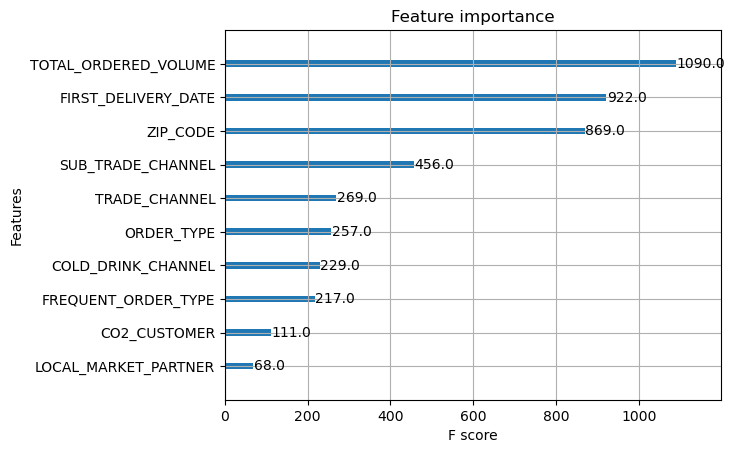

In [44]:
# Copying dataset
df2 = full_customer_data.copy()

# Drop unwanted columns (dates and unnecessary features)
df2 = df2.drop(columns=[ "ON_BOARDING_DATE", "PERCENT_CHANGE", "GROWTH_SAME_DECLINE", 2023.0, 2024.0, "CUSTOMER_NUMBER"])

# Convert datetime columns to the number of days since a reference date
reference_date = pd.to_datetime("2022-01-01")  # You can change this reference

df2["FIRST_DELIVERY_DATE"] = (pd.to_datetime(df2["FIRST_DELIVERY_DATE"]) - reference_date).dt.days

# Convert categorical columns to numeric
label_encoders = {}
for col in df2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le  # Store encoder for future use

# Define features and target variable
X = df2.drop(columns=['GROWTH_DECLINE'])  
y = df2['GROWTH_DECLINE']  

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model (correct approach)
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100  # Now correctly used
)

# Train the model
model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = model.predict(X_test2)

# Print accuracy
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test2, y_pred2))

# Feature importance plot
xgb.plot_importance(model)
plt.show()

In [45]:
#  define hyperparamater grid
param_grid = {
    'max_depth': [3, 6, 9],              # Controls tree complexity
    'learning_rate': [0.01, 0.1, 0.2],   # How much each tree contributes
    'n_estimators': [50, 100, 200],      # Number of boosting rounds
    'subsample': [0.8, 1.0],             # Fraction of data per boosting round
    'colsample_bytree': [0.8, 1.0],      # Fraction of features per tree
    'reg_lambda': [0, 1, 10],            # L2 regularization
    'reg_alpha': [0, 1, 10]              # L1 regularization
}

# set up grid serch with 5 folds cross validation
grid_search = GridSearchCV(
    XGBClassifier(objective="binary:logistic", eval_metric="logloss"),
    param_grid,
    scoring='accuracy',  # You can use 'f1' if recall is important
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=2
)


# train with grid serch
grid_search.fit(X_train2, y_train2)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# train the best model
best_model = XGBClassifier(**best_params)
best_model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = best_model.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Optimized Accuracy: {accuracy:.4f}")
print(classification_report(y_test2, y_pred2))

# Plot new feature importance
xgb.plot_importance(best_model)
plt.show()

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 10, 'reg_lambda': 0, 'subsample': 1.0}


ValueError: feature_names mismatch: ['ORDER_TYPE', 'TOTAL_ORDERED_VOLUME', 'FREQUENT_ORDER_TYPE', 'FIRST_DELIVERY_DATE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER', 'ZIP_CODE'] ['ORDER_TYPE', 'TOTAL_ORDERED_VOLUME', 'FREQUENT_ORDER_TYPE', 'FIRST_DELIVERY_DATE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER_x', 'ZIP_CODE', 'ORDERED_GALLONS', 'ORDERED_CASES', 'CO2_CUSTOMER_y']
expected CO2_CUSTOMER in input data
training data did not have the following fields: CO2_CUSTOMER_y, ORDERED_GALLONS, ORDERED_CASES, CO2_CUSTOMER_x

# Conclusion